<a href="https://colab.research.google.com/github/mediatanto/Data-Science/blob/main/MSIB_7_Final_Project_Team_Debugging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

Penyakit jantung adalah salah satu penyebab utama kematian di seluruh dunia. Gaya hidup yang tidak sehat, tekanan darah tinggi, kadar kolesterol yang buruk, dan faktor lainnya dapat meningkatkan risiko penyakit jantung. Melalui analisis data kesehatan, kita dapat memahami faktor-faktor utama yang memengaruhi risiko penyakit jantung, sehingga dapat memberikan rekomendasi program kesehatan yang tepat kepada individu berdasarkan profil kesehatan mereka.

- Goal : Rekomendasi Kesehatan Pencegahan Penyakit Jantung

- Problem : Klasifikasi

- Metode : Logistic Regression, Random Forest, SVM

--------------------------------------------------------------------

Rencana  kami untuk memvisualisasikan hasil data kami

Pasangan yang Direkomendasikan
- Age vs. Thalachh (Umur vs. Detak Jantung Maksimum)
Menunjukkan hubungan antara usia dan kemampuan jantung untuk bekerja secara maksimal.

- Cp vs. Target (Nyeri Dada vs. Diagnosa)
Berguna untuk menganalisis apakah jenis nyeri dada berkorelasi dengan kemungkinan memiliki penyakit.

- Oldpeak vs. Slope (Depresi ST vs. Kemiringan Segmen ST)
Untuk melihat pola perubahan segmen ST pada pasien.

- Ca vs. Target (Jumlah Pembuluh vs. Diagnosa)
Mengevaluasi hubungan antara jumlah pembuluh darah yang terlihat dan kemungkinan memiliki penyakit.

- Sex vs. Target (Jenis Kelamin vs. Diagnosa)
Mengetahui distribusi kemungkinan penyakit berdasarkan jenis kelamin.

- Fbs vs. Restecg (Gula Darah Puasa vs. Hasil EKG saat Istirahat)
Untuk mengevaluasi apakah gula darah tinggi memengaruhi hasil EKG.



## Pre Processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('cleaned_merged_heart_dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Info Atribut dalam Dataset Info Atribut dalam Dataset :

age = Usia

sex = Jenis kelamin

cp = Jenis nyeri dada (4 nilai) = Rentang 0 - 3 seberapa nyeri dada pasien

trestbps = Tekanan darah saat istirahat (Satuan dalam mmHg )

chol = Kadar Kolestrol serum dalam mg/dl

fbs = Gula darah puasa > 120 mg/dl ? (1 = Ya, 0 = Tidak)

restecg = Hasil elektrokardiografi setelah istirahat (nilai 0,1,2)

thalach = Detak jantung maksimum yang dicapai

exang = Mengalami angin setelah berolahraga? (1= Ya, 0 = Tidak)

oldpeak = Depresi Segmen ST yang disbebakan oleh olahraga relatif terhadap istirahat

slope = Gradien/Kemiringan Segmen ST

ca = Jumlah pembuluh darah utama (0-3) yang diwarnai dengan flourosopi

thal = Penyakit Menurun/Genetik Thalasemia : 1 = normal; 2 = cacat ; 3 = cacat yang dapat diperbaiki(carrier)

target = 1(Ada Penyakit Jantung) / 0(Tidak Ada Penyakit Jantung)

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


(1888, 14)

In [ ]:
print(df["age"])

0       63
1       37
2       41
3       56
4       57
        ..
1883    60
1884    46
1885    59
1886    54
1887    53
Name: age, Length: 1888, dtype: int64


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()

1286

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,0.688559,1.279131,131.549258,246.855403,0.148305,0.597458,149.424258,0.331568,1.053761,1.421610,0.731462,2.662606,0.517479
std,9.081505,0.463205,1.280877,17.556985,51.609329,0.355496,0.638820,23.006153,0.470901,1.161344,0.619588,1.015735,1.249924,0.499827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


In [ ]:
df ['sex'].value_counts()

,count
sex,
1,1300
0,588


In [ ]:
df ['age'].value_counts()

,count
age,
58,118
54,102
57,95
59,85
52,80
51,75
60,75
56,69
62,69


In [ ]:
df ['target'].value_counts()

,count
target,
1,977
0,911


# EDA

Text(0.5, 1.0, 'Heatmap')

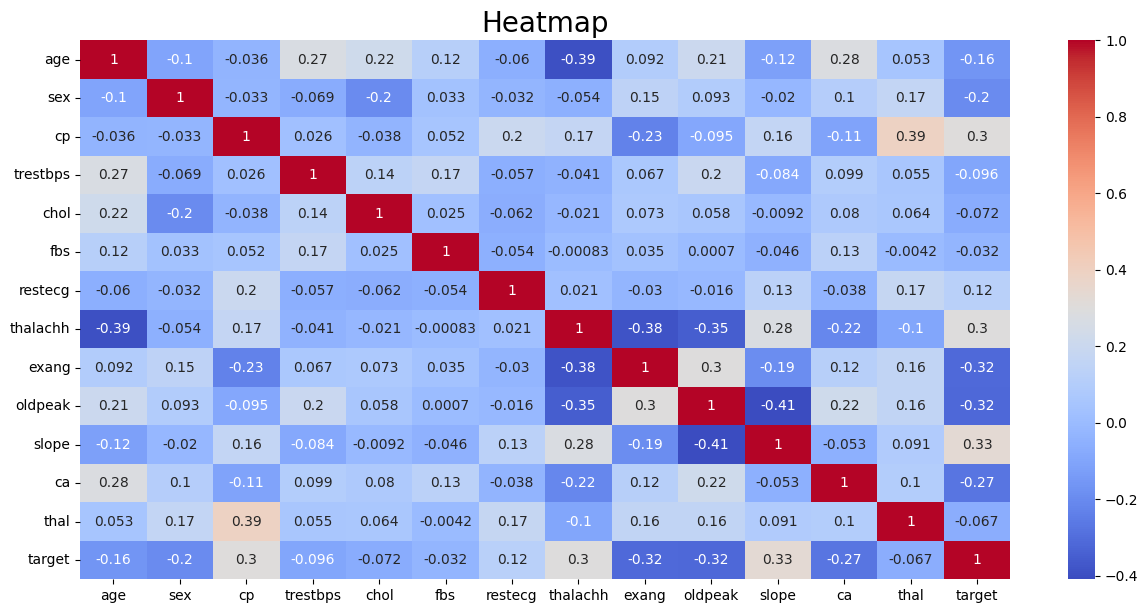

In [ ]:
#korelasi antar kolom dengan heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap', fontsize=20)

Berdasarkan heatmap yang ditampilkan, berikut adalah interpretasi hubungan antar variabel berdasarkan nilai korelasinya:

- age dan target (-0.16): Terdapat hubungan negatif yang sangat lemah, menunjukkan bahwa usia sedikit berpengaruh terhadap target tetapi tidak signifikan.

- sex dan target (-0.20): Hubungan negatif lemah, yang menunjukkan bahwa jenis kelamin memiliki pengaruh kecil terhadap target.

- cp (chest pain) dan target (0.30): Hubungan positif sedang, menunjukkan bahwa jenis nyeri dada memiliki hubungan cukup signifikan terhadap target.

- trestbps (resting blood pressure) dan target (-0.096): Hubungan negatif yang sangat lemah, sehingga tekanan darah saat istirahat hampir tidak berpengaruh pada target.

- chol (serum cholesterol) dan target (-0.072): Hubungan negatif yang sangat lemah, menunjukkan kolesterol tidak memiliki pengaruh signifikan pada target.

- fbs (fasting blood sugar) dan target (-0.032): Hubungan negatif yang sangat lemah, artinya kadar gula puasa tidak terlalu berpengaruh pada target.

- restecg (resting ECG results) dan target (0.12): Hubungan positif yang lemah, menunjukkan hasil ECG sedikit berhubungan dengan target.

- thalachh (maximum heart rate achieved) dan target (0.30): Hubungan positif sedang, menunjukkan bahwa denyut jantung maksimum memiliki pengaruh signifikan terhadap target.

- exang (exercise-induced angina) dan target (-0.32): Hubungan negatif sedang, menunjukkan bahwa angina yang dipicu oleh olahraga memiliki pengaruh signifikan terhadap target.

- oldpeak (ST depression induced by exercise) dan target (-0.32): Hubungan negatif sedang, menunjukkan bahwa depresi ST memiliki pengaruh terhadap target.

- slope (slope of the peak exercise ST segment) dan target (0.33): Hubungan positif sedang, menunjukkan bahwa slope ST memiliki pengaruh signifikan terhadap target.

- ca (number of major vessels colored by fluoroscopy) dan target (-0.27): Hubungan negatif sedang, menunjukkan bahwa jumlah pembuluh darah utama memiliki pengaruh cukup signifikan terhadap target.

- thal (thalassemia) dan target (-0.067): Hubungan negatif sangat lemah, menunjukkan thalassemia hampir tidak memiliki pengaruh terhadap target.

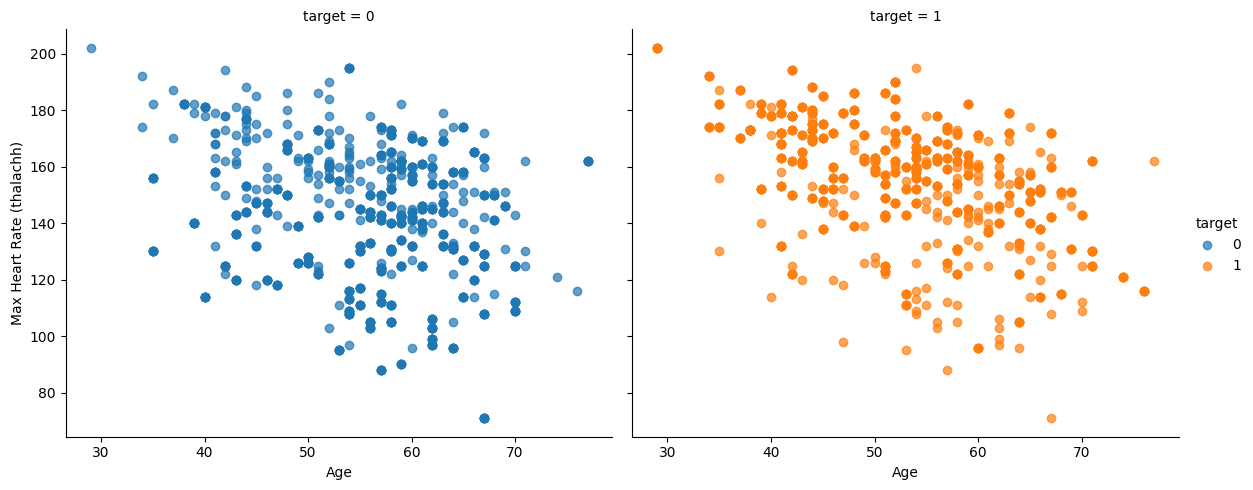

In [ ]:
# Membuat scatterplot dengan FacetGrid
scatplot = sns.FacetGrid(df, col='target', hue='target', height=5, aspect=1.2)
scatplot.map(plt.scatter, 'age', 'thalachh', alpha=0.7)  # 'thalachh' sebagai contoh variabel numerik di y-axis
scatplot.add_legend()
scatplot.set_axis_labels("Age", "Max Heart Rate (thalachh)")
plt.show()

Target = 0

- Individu yang tidak memiliki penyakit jantung cenderung memiliki detak jantung maksimum yang lebih rendah dibandingkan individu dengan penyakit jantung.

- Ada indikasi bahwa usia tidak selalu menjadi faktor dominan dalam menentukan target = 0.

Terget = 1

- Individu dengan penyakit jantung cenderung memiliki detak jantung maksimum yang lebih tinggi dibandingkan individu tanpa penyakit jantung.

- Usia 40-60 tahun tampaknya menjadi kelompok yang lebih berisiko terkena penyakit jantung, sesuai dengan data di plot ini.

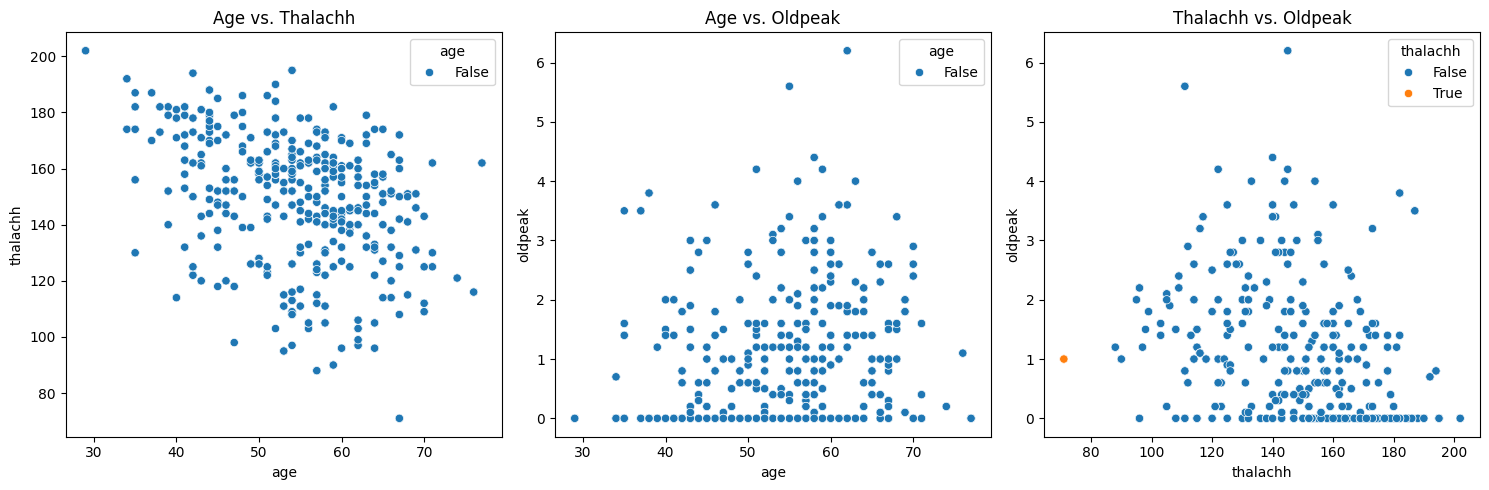

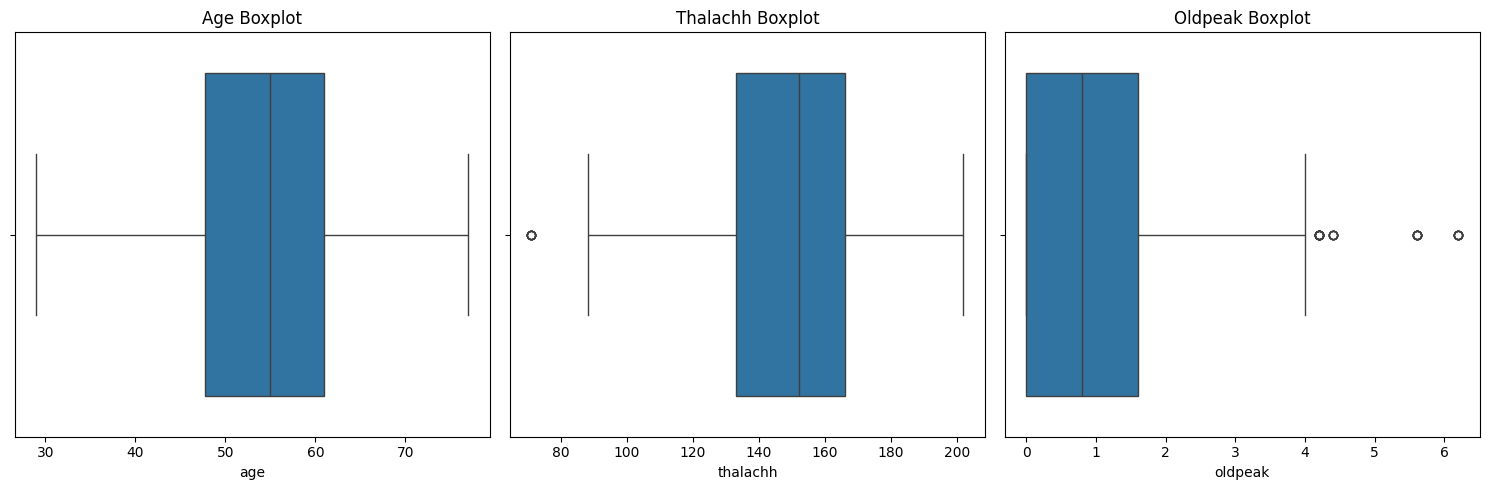

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Detect and handle outliers for 'age', 'thalach', and 'oldpeak'
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ~data.between(lower_bound, upper_bound)

outliers_age = detect_outliers_iqr(df['age'])
outliers_thalach = detect_outliers_iqr(df['thalachh'])
outliers_oldpeak = detect_outliers_iqr(df['oldpeak'])

# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='thalachh', data=df, hue=outliers_age)
plt.title('Age vs. Thalachh')

plt.subplot(1, 3, 2)
sns.scatterplot(x='age', y='oldpeak', data=df, hue=outliers_age)
plt.title('Age vs. Oldpeak')

plt.subplot(1, 3, 3)
sns.scatterplot(x='thalachh', y='oldpeak', data=df, hue=outliers_thalach)
plt.title('Thalachh vs. Oldpeak')

plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['age'])
plt.title('Age Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['thalachh'])
plt.title('Thalachh Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['oldpeak'])
plt.title('Oldpeak Boxplot')

plt.tight_layout()
plt.show()

# Pemodelan

Metode : Logistic Regression, Random Forest, dan SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X = df.drop('target', axis=1)  # Semua kolom kecuali target
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,60,1,0,140,207,0,0,138,1,1.9,2,1,3
1884,46,1,0,140,311,0,1,120,1,1.8,1,2,3
1885,59,1,3,134,204,0,1,162,0,0.8,2,2,2
1886,54,1,1,154,232,0,0,164,0,0.0,2,1,2


In [ ]:
y = df['target']  # Kolom target
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
1883,0
1884,0
1885,0
1886,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Logistic Regression

In [ ]:
# Melatih model Logistic Regression
model = LogisticRegression(max_iter=1000)  # Menambahkan max_iter jika dataset besar
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Memprediksi hasil pada data test
y_pred = model.predict(X_test)

In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       182
           1       0.72      0.83      0.77       196

    accuracy                           0.75       378
   macro avg       0.75      0.74      0.74       378
weighted avg       0.75      0.75      0.74       378



In [ ]:
# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.75


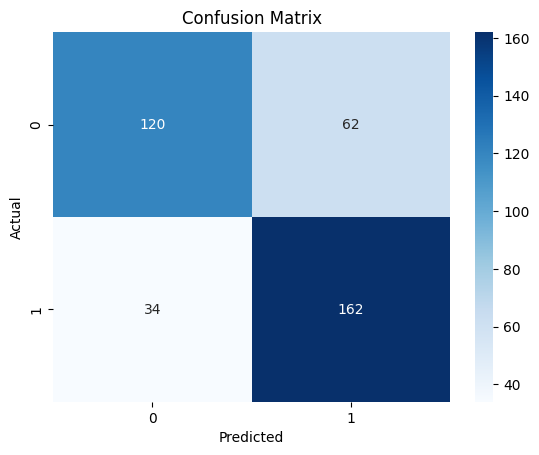

In [ ]:
# visualisasi Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

True Negative (TN) (Kotak kiri atas): Model memprediksi negatif (0) dengan benar. Jumlahnya = 121.

False Positive (FP) (Kotak kanan atas): Model memprediksi positif (1) tetapi sebenarnya negatif (0). Jumlahnya = 61.

False Negative (FN) (Kotak kiri bawah): Model memprediksi negatif (0) tetapi sebenarnya positif (1). Jumlahnya = 38.

True Positive (TP) (Kotak kanan bawah): Model memprediksi positif (1) dengan benar. Jumlahnya = 158.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 tree dalam hutan

# Melatih model pada data latih
rf_model.fit(X_train, y_train)

# Memprediksi target pada data uji
y_pred = rf_model.predict(X_test)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       182
           1       0.97      0.99      0.98       196

    accuracy                           0.98       378
   macro avg       0.98      0.98      0.98       378
weighted avg       0.98      0.98      0.98       378



In [ ]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.9841269841269841


Text(113.9222222222222, 0.5, 'predicted\xa0label')

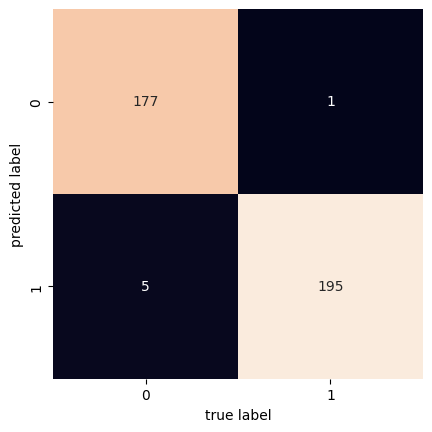

In [ ]:
#Memvisualisasikan confustion matrix

mat=confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

True Negative (TN) (Kotak kiri atas): Model memprediksi negatif (0) dengan benar. Jumlahnya = 165.

False Positive (FP) (Kotak kanan atas): Model memprediksi positif (1) tetapi sebenarnya negatif (0). Jumlahnya = 2.

False Negative (FN) (Kotak kiri bawah): Model memprediksi negatif (0) tetapi sebenarnya positif (1). Jumlahnya = 17.

True Positive (TP) (Kotak kanan bawah): Model memprediksi positif (1) dengan benar. Jumlahnya = 194.

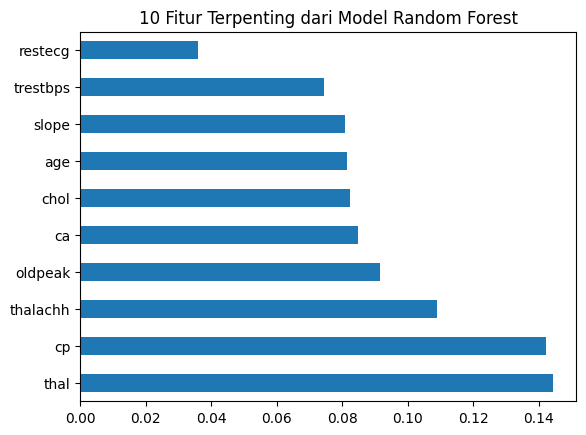

In [ ]:
# Signifikan factor dari model

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('10 Fitur Terpenting dari Model Random Forest')
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Objek SVM
# Hypher parameter yang ditentukan adlaah n_estimator (jumlah pohon dalam hutan) = 100 dan max_depth (kedalaman pohon) = 4
svm = SVC(kernel = 'linear', random_state = 0)

# Model training
model_svm = svm.fit(X_train, y_train)

# Predik Model
y_pred_svm = model_svm.predict(X_test)

In [ ]:
# Evaluasi Model SVM

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68       182
           1       0.70      0.91      0.79       196

    accuracy                           0.75       378
   macro avg       0.77      0.74      0.74       378
weighted avg       0.77      0.75      0.74       378



In [ ]:
# Akurasi
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.75


Text(113.9222222222222, 0.5, 'predicted\xa0label')

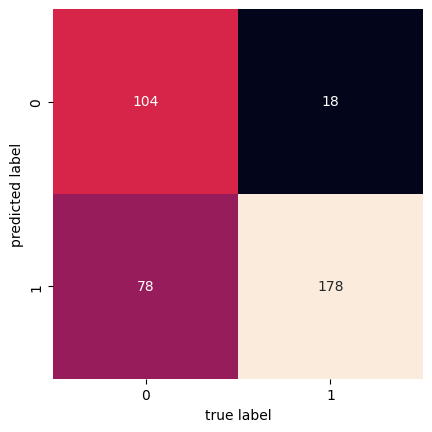

In [ ]:
#Memvisualisasikan confustion matrix

mat=confusion_matrix(y_test, y_pred_svm)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

True Negative (TN) (Kotak kiri atas): Model memprediksi negatif (0) dengan benar. Jumlahnya = 117.

False Positive (FP) (Kotak kanan atas): Model memprediksi positif (1) tetapi sebenarnya negatif (0). Jumlahnya = 25.

False Negative (FN) (Kotak kiri bawah): Model memprediksi negatif (0) tetapi sebenarnya positif (1). Jumlahnya = 65.

True Positive (TP) (Kotak kanan bawah): Model memprediksi positif (1) dengan benar. Jumlahnya = 171.

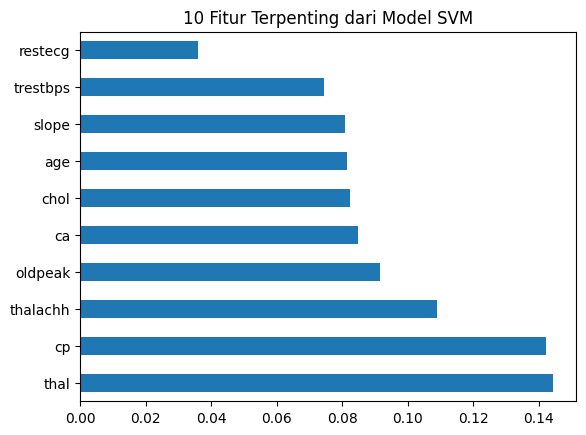

In [ ]:
from sklearn.feature_selection import SelectFromModel

feat_importances.nlargest(10).plot(kind='barh')
plt.title('10 Fitur Terpenting dari Model SVM')
plt.show()

## Test AUC

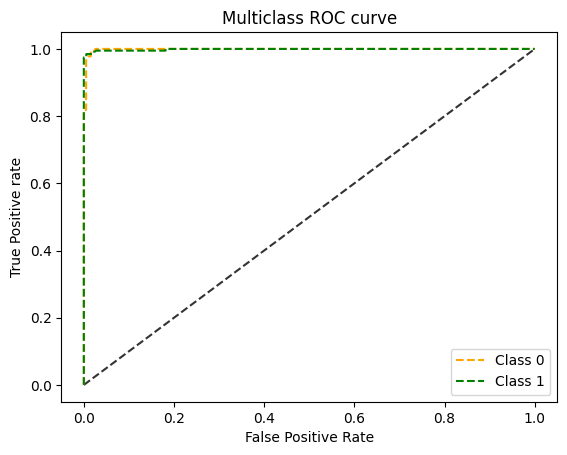

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Memprediksi probabilities pada data uji, bukan hanya label class
y_pred_proba = rf_model.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2 # Assuming you have 2 classes

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)

# plotting
plt.plot([0, 1], [0, 1], linestyle='--', color='black', alpha=0.8)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

Iteration 1
  Logistic Regression: AUC = 0.8070
  Random Forest: AUC = 0.9983
  SVM: AUC = 0.7941
Iteration 2
  Logistic Regression: AUC = 0.8070
  Random Forest: AUC = 0.9989
  SVM: AUC = 0.7941
Iteration 3
  Logistic Regression: AUC = 0.8070
  Random Forest: AUC = 0.9985
  SVM: AUC = 0.7941
Iteration 4
  Logistic Regression: AUC = 0.8070
  Random Forest: AUC = 0.9987
  SVM: AUC = 0.7941
Iteration 5
  Logistic Regression: AUC = 0.8070
  Random Forest: AUC = 0.9991
  SVM: AUC = 0.7936

Average AUC over 5 iterations:
  Logistic Regression: Average AUC = 0.8070
  Random Forest: Average AUC = 0.9987
  SVM: Average AUC = 0.7940


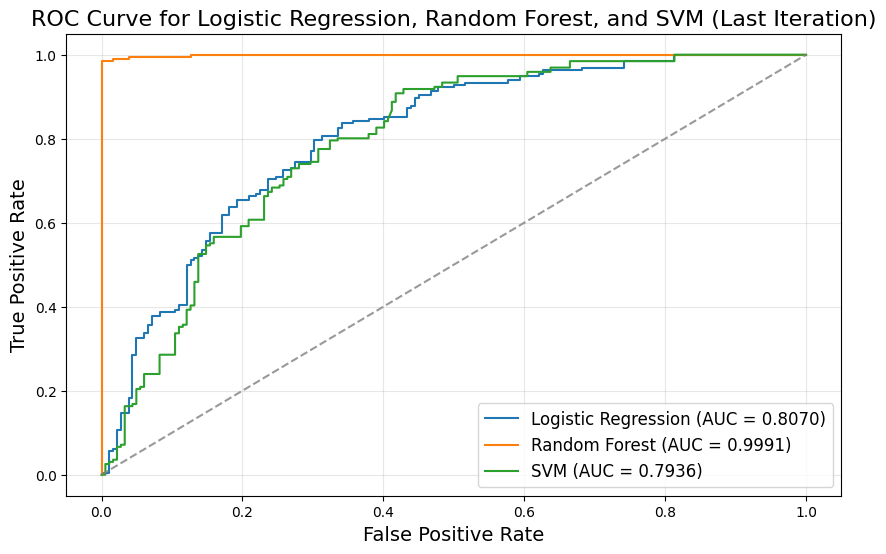

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Variabel untuk menyimpan rata-rata AUC dari 5 iterasi
average_auc = {
    "Logistic Regression": [],
    "Random Forest": [],
    "SVM": []
}

# Iterasi 5 kali
for iteration in range(5):
    print(f"Iteration {iteration + 1}")

    # Inisialisasi model
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=iteration),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=iteration),
        "SVM": SVC(kernel='linear', probability=True, random_state=iteration)
    }

    # Inisialisasi untuk menyimpan hasil FPR dan TPR
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Looping melalui model untuk menghitung ROC curve
    for model_name, model in models.items():
        # Melatih model
        model.fit(X_train, y_train)

        # Memprediksi probabilities
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Menghitung ROC curve
        fpr[model_name], tpr[model_name], _ = roc_curve(y_test, y_pred_proba)

        # Menghitung AUC
        auc = roc_auc_score(y_test, y_pred_proba)
        roc_auc[model_name] = auc
        average_auc[model_name].append(auc)
        print(f"  {model_name}: AUC = {auc:.4f}")

# Menghitung rata-rata AUC untuk setiap model
print("\nAverage AUC over 5 iterations:")
for model_name in average_auc.keys():
    mean_auc = np.mean(average_auc[model_name])
    print(f"  {model_name}: Average AUC = {mean_auc:.4f}")

# Plotting ROC curve untuk setiap model dari iterasi terakhir
plt.figure(figsize=(10, 6))
for model_name in models.keys():
    plt.plot(fpr[model_name], tpr[model_name], label=f'{model_name} (AUC = {roc_auc[model_name]:.4f})')

# Menambahkan elemen plot
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', alpha=0.8)
plt.title('ROC Curve for Logistic Regression, Random Forest, and SVM (Last Iteration)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.grid(alpha=0.3)
plt.show()

## Kesimpulan

- Logistic Regression: 0.74

- Random Forest: 0.96

- SVM: 0.75

Logistic Regression: Dengan skor akurasi 0.74, model ini memberikan kinerja yang cukup baik dalam memprediksi, namun masih memiliki keterbatasan dalam menangani hubungan non-linear pada data.

Random Forest: Dengan akurasi 0.96, model ini menunjukkan performa yang sangat tinggi, berkat kemampuannya menangkap hubungan kompleks dan mengatasi overfitting dengan teknik ensemble learning.

Support Vector Machine (SVM): Akurasi 0.75 menunjukkan performa yang sedikit lebih baik dibandingkan Logistic Regression, namun mungkin terbatas dalam skenario dengan dataset besar atau banyak fitur.

Rekomendasi:

# Rekomendasi Kesehatan

In [ ]:
# Prediksi dataset menggunakan Random Forest
y_pred = rf_model.predict(X)  # Memprediksi seluruh dataset

# Menghitung jumlah prediksi untuk setiap kelas (0 dan 1)
unique, counts = np.unique(y_pred, return_counts=True)
prediction_counts = dict(zip(unique, counts))

# Output prediksi jumlah pasien
print("Prediksi Jumlah Pasien:")
print(f"Tidak terindikasi Penyakit Jantung (0): {prediction_counts.get(0, 0)}")
print(f"Terindikasi Penyakit Jantung (1): {prediction_counts.get(1, 0)}")

Prediksi Jumlah Pasien:
Tidak terindikasi Penyakit Jantung (0): 907
Terindikasi Penyakit Jantung (1): 981


In [ ]:
# Function to provide health recommendations based on Random Forest predictions
def health_recommendations(model, features):
    # Memastikan input adalah array 2D
    features = np.array(features).reshape(1, -1)
    prediction = model.predict(features)

    if prediction == 1:
        return """
        Anda terindikasi berisiko terkena penyakit jantung. Berikut beberapa rekomendasi:

        1. Perubahan Gaya Hidup:
           - Meningkatkan aktivitas fisik secara teratur, minimal 30 menit per hari.
           - Mengelola stres melalui teknik relaksasi seperti yoga atau meditasi.

        2. Konsultasi Medis:
           - Segera berkonsultasi dengan dokter untuk pemeriksaan lebih lanjut dan saran pengobatan.
           - Patuhi pengobatan yang diberikan oleh dokter secara teratur.
           - Lakukan pengecekan kesehatan secara berkala untuk memonitor kondisi jantung.
        """
    else:
        return """
        Anda tidak terindikasi berisiko terkena penyakit jantung.
        Namun, tetap pertahankan pola hidup sehat untuk mencegah potensi risiko di masa mendatang:

        1. Pertahankan Gaya Hidup Sehat:
           - Konsumsi makanan bergizi seimbang.
           - Rajin berolahraga.
           - Kelola stres dengan baik.
           - Tidur yang cukup.

        2. Pemeriksaan Kesehatan Berkala:
           - Melakukan pengecekan kesehatan secara teratur untuk deteksi dini penyakit jantung.
        """

# Contoh fitur untuk rekomendasi
example_features = X.iloc[100]  # Menggunakan baris pertama dataset sebagai contoh
recommendation = health_recommendations(rf_model, example_features)
print(recommendation)

# Get feature importances
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Print top 5 features
print("\nTop 5 Most Important Features:")
print(feat_importances.nlargest(5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



        Anda terindikasi berisiko terkena penyakit jantung. Berikut beberapa rekomendasi:

        1. Perubahan Gaya Hidup:
           - Meningkatkan aktivitas fisik secara teratur, minimal 30 menit per hari.
           - Mengelola stres melalui teknik relaksasi seperti yoga atau meditasi.

        2. Konsultasi Medis:
           - Segera berkonsultasi dengan dokter untuk pemeriksaan lebih lanjut dan saran pengobatan.
           - Patuhi pengobatan yang diberikan oleh dokter secara teratur.
           - Lakukan pengecekan kesehatan secara berkala untuk memonitor kondisi jantung.
        

Top 5 Most Important Features:
thal        0.144184
cp          0.142221
thalachh    0.108879
oldpeak     0.091443
ca          0.084686
dtype: float64
